<center>
    <h1>Machine Learning</h1>
    <h2>Lab 8</h2>
</center>
<h3>Understand the steps of kNN (k-Nearest Neighbor) and impliment it for iris dataset.</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline

In [2]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X = df
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h3>Check KNN with neighbour 1</h3>

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]], dtype=int64)

<h2>Choosing K value</h2>

In [9]:
accuracy_rate = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10)
    accuracy_rate.append(score.mean())

In [10]:
error_rate = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

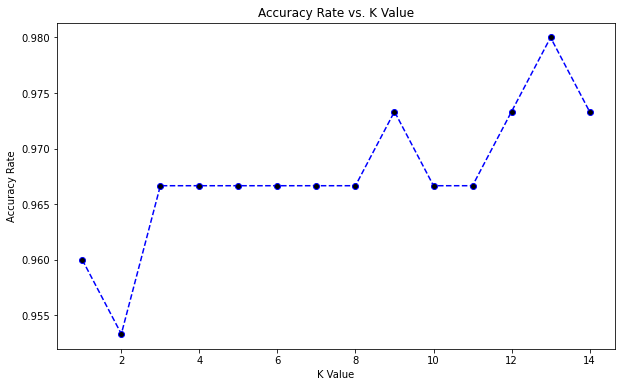

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15), accuracy_rate, markerfacecolor='black', marker='o', color='blue', linestyle='dashed')
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')

<h2>Plotting Accuracy rate and Error rate</h2>

Text(0, 0.5, 'Error Rate')

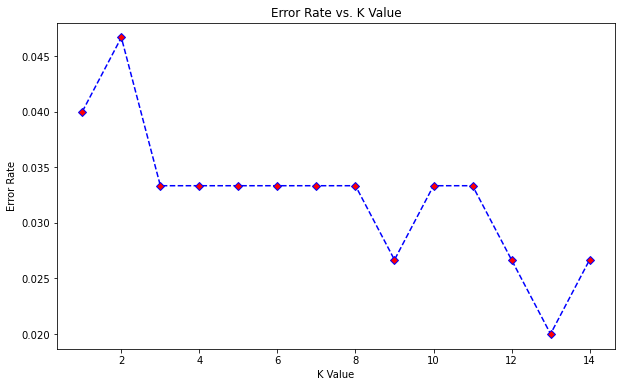

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15), error_rate, color='blue', marker='D', markerfacecolor='red', linestyle='dashed')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

<h4>By observing above plots, the accuracy increases after the K=3.</h4>

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]], dtype=int64)

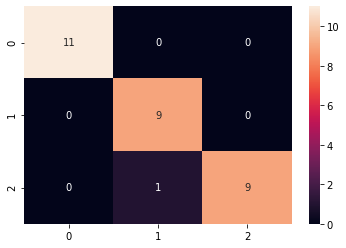

In [15]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      1.00      0.95         9
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

